<a href="https://colab.research.google.com/github/JulioCastillo1/TP1-Datos/blob/master/Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url1 = "https://raw.githubusercontent.com/JulioCastillo1/TP1-Datos/master/stopwords_count.csv"
url2 = "https://raw.githubusercontent.com/JulioCastillo1/TP1-Datos/master/tweets_length.csv"
tweetsStopwords = pd.read_csv(url1)
tweetsLengths = pd.read_csv(url2)
tweetsStopwords

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Unnamed: 0,id,keyword,location,text,target,stopwords_count
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,7
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,3
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,13
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,2
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,10
...,...,...,...,...,...,...,...
7201,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,6
7202,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,13
7203,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,4
7204,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,12


In [3]:
tweetsLengths

,Unnamed: 0,id,keyword,location,text,target,longitud
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...,...
7608,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


In [4]:
merged = tweetsStopwords.merge(tweetsLengths)
merged

,Unnamed: 0,id,keyword,location,text,target,stopwords_count,longitud
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,7,69
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,3,38
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,13,133
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,2,65
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,10,88
...,...,...,...,...,...,...,...,...
7201,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,6,83
7202,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,13,125
7203,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,4,65
7204,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,12,137


In [5]:
merged['longitud'].describe()

count    7206.000000
mean      100.939634
std        33.923813
min         7.000000
25%        77.250000
50%       107.000000
75%       133.000000
max       157.000000
Name: longitud, dtype: float64

In [6]:
merged['stopwords_count'].describe()

count    7206.000000
mean        7.782681
std         3.635657
min         0.000000
25%         5.000000
50%         8.000000
75%        10.000000
max        23.000000
Name: stopwords_count, dtype: float64

In [7]:
binsLength = pd.cut(merged['longitud'], bins=[0, 20, 40, 60, 80, 100, 120, 140, 160])
merged['binLength'] = binsLength
binsStopWords = pd.cut(merged['stopwords_count'], bins=[0, 5, 10, 15, 20, 25, 30])
merged['binStopWords'] = binsStopWords
merged

,Unnamed: 0,id,keyword,location,text,target,stopwords_count,longitud,binLength,binStopWords
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,7,69,"(60, 80]","(5, 10]"
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,3,38,"(20, 40]","(0, 5]"
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,13,133,"(120, 140]","(10, 15]"
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,2,65,"(60, 80]","(0, 5]"
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,10,88,"(80, 100]","(5, 10]"
...,...,...,...,...,...,...,...,...,...,...
7201,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,6,83,"(80, 100]","(5, 10]"
7202,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,13,125,"(120, 140]","(10, 15]"
7203,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,4,65,"(60, 80]","(0, 5]"
7204,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,12,137,"(120, 140]","(10, 15]"


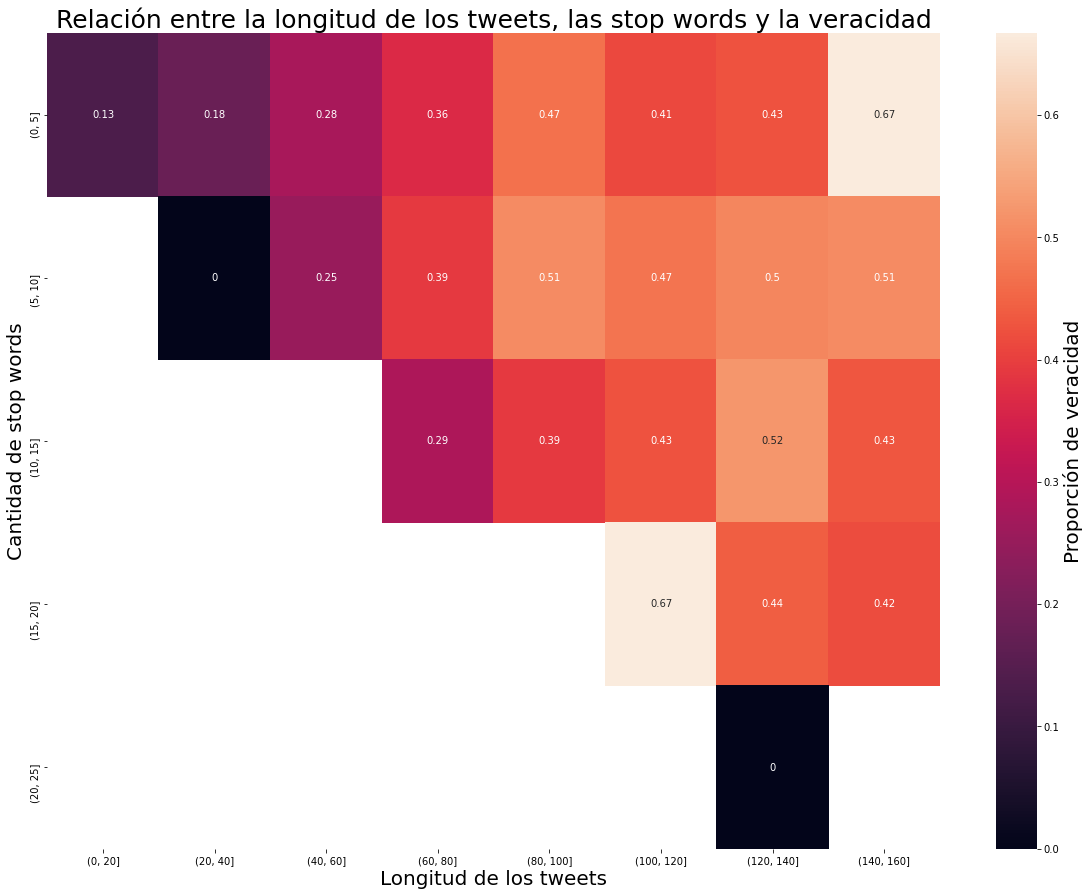

In [8]:
data=pd.pivot_table(merged, columns='binLength',values='target',index='binStopWords')
plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.title("Relación entre la longitud de los tweets, las stop words y la veracidad", fontsize=25)
ax=sns.heatmap(data, annot=True, cbar_kws={'label':'Proporción de veracidad'})
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.xlabel("Longitud de los tweets", fontsize=20)
plt.ylabel("Cantidad de stop words", fontsize=20)
plt.show()